In [5]:
import requests
import pandas as pd

def get_all_bitcoin_prices():
    # API endpoint for historical daily Bitcoin price data
    url = 'https://min-api.cryptocompare.com/data/v2/histoday'
    
    all_prices = []
    # Set the start date to Bitcoin's inception and end date to today
    start_year = 2009
    end_year = pd.to_datetime('today').year

    # Loop through each year
    for year in range(start_year, end_year + 1):
        # Set the start and end timestamps for the year
        start_timestamp = int(pd.to_datetime(f'{year}-01-01').timestamp())
        end_timestamp = int(pd.to_datetime(f'{year}-12-31').timestamp())

        # Parameters for the API request
        params = {
            'fsym': 'BTC',        # From symbol (Bitcoin)
            'tsym': 'USD',        # To symbol (US Dollar)
            'limit': 370,        # Maximum number of records per request
            'toTs': end_timestamp # End timestamp for the year
        }

        # Making the GET request to the API
        response = requests.get(url, params=params)

        # Check if the response was successful
        if response.status_code == 200:
            data = response.json()
            prices = data['Data']['Data']
            
            # Append the prices to the full list
            all_prices.extend(prices)
            print(f"fetching data for year {year}: {response.status_code}")

        else:
            print(f"Error fetching data for year {year}: {response.status_code}")
            continue

    # Convert to DataFrame
    df = pd.DataFrame(all_prices)
    # Convert timestamp to datetime
    df['time'] = pd.to_datetime(df['time'], unit='s')
    # Set timestamp as index
    df.set_index('time', inplace=True)
    
    # Remove duplicates in case of any overlapping data
    df = df[~df.index.duplicated(keep='first')]

    # Return only the closing price
    return df[['close']]

# Fetch and print the full Bitcoin historical data
bitcoin_prices_df = get_all_bitcoin_prices()

fetching data for year 2009: 200
fetching data for year 2010: 200
fetching data for year 2011: 200
fetching data for year 2012: 200
fetching data for year 2013: 200
fetching data for year 2014: 200
fetching data for year 2015: 200
fetching data for year 2016: 200
fetching data for year 2017: 200
fetching data for year 2018: 200
fetching data for year 2019: 200
fetching data for year 2020: 200
fetching data for year 2021: 200
fetching data for year 2022: 200
fetching data for year 2023: 200
fetching data for year 2024: 200


In [6]:
bitcoin_prices_df.head()

,close
time,
2008-12-26,0.0
2008-12-27,0.0
2008-12-28,0.0
2008-12-29,0.0
2008-12-30,0.0


In [7]:
bitcoin_prices_df.tail()

,close
time,
2024-11-07,75922.41
2024-11-08,76562.31
2024-11-09,76716.41
2024-11-10,80429.43
2024-11-11,81589.22


In [10]:
bitcoin_prices_df = bitcoin_prices_df[bitcoin_prices_df['close'] > 0]

In [11]:
bitcoin_prices_df

,close
time,
2010-07-17,0.04951
2010-07-18,0.08584
2010-07-19,0.08080
2010-07-20,0.07474
2010-07-21,0.07921
...,...
2024-11-07,75922.41000
2024-11-08,76562.31000
2024-11-09,76716.41000


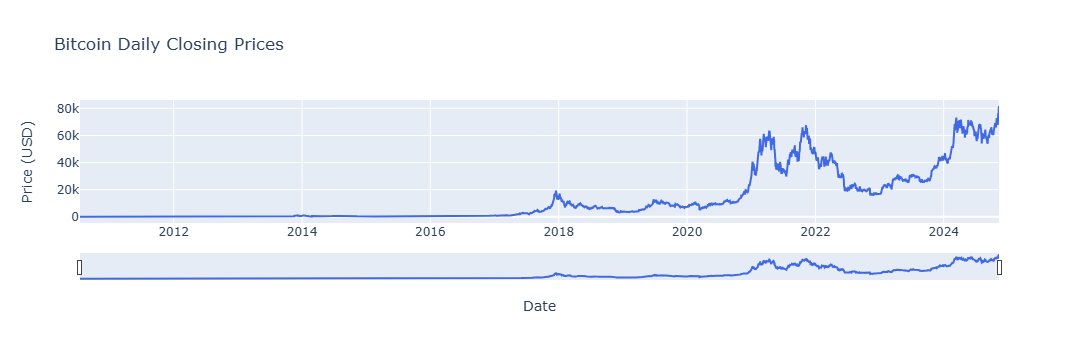

In [12]:
import plotly.graph_objs as go

# Assuming bitcoin_prices_df has 'time' as index and a 'close' column
fig = go.Figure()

# Add a line trace for Bitcoin closing prices
fig.add_trace(go.Scatter(
    x=bitcoin_prices_df.index,  # Dates
    y=bitcoin_prices_df['close'],  # Closing prices
    mode='lines',
    name='Bitcoin Price',
    line=dict(color='royalblue', width=2)
))

# Update layout
fig.update_layout(
    title="Bitcoin Daily Closing Prices",
    xaxis_title="Date",
    yaxis_title="Price (USD)",
    xaxis_rangeslider_visible=True  # Adds a range slider for better interaction
)

# Show plot
fig.show()


In [13]:
import pandas as pd

# Assuming bitcoin_prices_df is your DataFrame with 'close' prices and 'time' as the index

def calculate_returns_with_windows(df, windows):
    results = []

    # Loop through each specified window in years
    for years in windows:
        # Calculate the number of days for the given years
        num_days = years * 365  # Approximation: 365 days per year
        
        # Calculate returns for the sliding window
        returns = []
        
        # Iterate over the DataFrame to calculate returns
        for i in range(num_days, len(df)):
            # Calculate the return for the window
            initial_price = df['close'].iloc[i - num_days]  # Price at the start of the window
            final_price = df['close'].iloc[i]  # Price at the end of the window
            if initial_price > 0:  # Avoid division by zero
                returns.append((final_price - initial_price) / initial_price)

        # Calculate the median return for the current window
        median_return = pd.Series(returns).median()
        
        # Append results including the number of windows
        results.append({
            'Holding Year': years,
            'Median Return': median_return,
            'Window Num': len(returns)  # Count of available windows
        })

    # Create a DataFrame from the results
    return pd.DataFrame(results)

# Define the holding periods in years
holding_periods = [1, 2, 3, 4, 5,]

# Calculate the returns
median_returns_df = calculate_returns_with_windows(bitcoin_prices_df, holding_periods)

# Display the results
median_returns_df

,Holding Year,Median Return,Window Num
0,1,1.216358,4867
1,2,2.947252,4502
2,3,7.218205,4137
3,4,16.091746,3772
4,5,41.542631,3407
